In [ ]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
files.upload()

Saving 100_DATASET_PC_BANK_X.csv to 100_DATASET_PC_BANK_X (3).csv


{'100_DATASET_PC_BANK_X.csv': b'Device Name,OS Name,RAM,Processor Type,Harddisk Size,Application Errors,System Manufacturer,Umur\r\nTM1PC3192700100,13,3977,15,476938,19,2,4\r\nTM1PC0624090100,3,3476,15,476938,43,1,7\r\nTM1PC5844450100,3,3476,15,476938,190,1,7\r\nTM1PC0676880100,3,1919,14,476938,91,1,7\r\nTM1PC0351340100,3,3476,15,476938,8,1,7\r\nTM1PC5528660100,13,3977,15,476938,114,2,4\r\nTM1PC0728460100,3,3476,15,476938,73,1,7\r\nTM1PC274248001,23,3991,3,476938,1,1,2\r\nTM1PC1320550100,13,3977,15,476938,0,2,4\r\nTM1PC0698520100,3,1859,3,476938,11,4,8\r\nTM1PC4585310100,1,1917,9,152625,26,1,9\r\nTM1PC0321320100,13,3986,15,476938,21,1,5\r\nTM1PC0283070100,3,3476,15,476938,144,1,7\r\nTM1PC3630100200,23,3970,15,476938,109,1,7\r\nTM1PC0845190100,13,3977,15,476938,18,2,4\r\nTM1PC3131720100,23,8066,15,476938,3,1,7\r\nTM1PC0547350100,3,3476,15,76293,32,1,7\r\nTM1PC1030920100,3,3476,15,305243,240,1,7\r\nTM1PC0301130100,3,3476,15,476938,44,1,7\r\nTM1PC6277060100,3,3476,15,476938,79,1,7\r\nYUNI

In [ ]:
df = pd.read_csv("100_DATASET_PC_BANK_X.csv",  index_col=0) 
print(df) 

                 OS Name    RAM  ...  System Manufacturer  Umur
Device Name                      ...                           
17106103MKS            3   1015  ...                    1    13
990180102CCR          23   8015  ...                    1     0
WM2PC018544           23  16186  ...                    1     1
RRC15200060017         9   3495  ...                    4     5
1150076_CHN           15   2013  ...                   23     6
...                  ...    ...  ...                  ...   ...
CLO99018096024         1    989  ...                    4    10
CLO99018178009         1    987  ...                    2     9
WM2PC0105620100       23   3932  ...                    1     1
10601058RLT           23   3920  ...                    1     1
1060194CLOAN           3   1947  ...                    4     5

[100 rows x 7 columns]


In [ ]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
names = df.columns
data_scaled = min_max_scaler.fit_transform(df)
data = pd.DataFrame(data_scaled, columns=names)
print(data)

     OS Name       RAM  ...  System Manufacturer      Umur
0   0.090909  0.016575  ...             0.000000  0.866667
1   1.000000  0.468043  ...             0.000000  0.000000
2   1.000000  0.995034  ...             0.000000  0.066667
3   0.363636  0.176524  ...             0.136364  0.333333
4   0.636364  0.080942  ...             1.000000  0.400000
..       ...       ...  ...                  ...       ...
95  0.000000  0.014898  ...             0.136364  0.666667
96  0.000000  0.014769  ...             0.045455  0.600000
97  1.000000  0.204708  ...             0.000000  0.066667
98  1.000000  0.203934  ...             0.000000  0.066667
99  0.090909  0.076685  ...             0.136364  0.333333

[100 rows x 7 columns]


In [ ]:
#ambil medoid acak
def init_medoids(X, k):
    from numpy.random import choice

    samples = choice(len(X), size=k, replace=False)
    return X.iloc[samples, :]

medoids_initial = init_medoids(data, 3)

print(medoids_initial)

     OS Name       RAM  ...  System Manufacturer      Umur
89  0.090909  0.175298  ...                  0.0  0.466667
20  0.000000  0.175234  ...                  0.0  0.466667
65  0.090909  0.175298  ...                  0.0  0.466667

[3 rows x 7 columns]


In [ ]:

def distance(X, medoids):
    m = len(X)
    X = X.values
    medoids_shape = medoids.shape
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)

    S = np.empty((m, k))
    
    for i in range(m):
       S[i, :] = np.linalg.norm(medoids - X[i, :], axis=1).reshape(1,len(medoids))

    return S

print('==========EUCLIDEAN DISTANCE==========\n')
distance_awal = distance(data, medoids_initial)
np.set_printoptions(threshold=5)
print(distance_awal)

==========EUCLIDEAN DISTANCE==========

[[0.92267824 0.92852247 0.89866902]
 [1.06579339 1.14430475 1.08709226]
 [1.50003869 1.55681956 1.61986584]
 ...
 [1.06551001 1.14402741 1.08681572]
 [1.06550018 1.14400962 1.08679838]
 [0.94771825 0.95208155 0.97165779]]


In [ ]:
def clustering(S):
    return np.argmin(S, axis=1)

cluster_awal = clustering(distance_awal)
print("===========================HASIL CLUSTERING AWAL==========================\n")
np.set_printoptions(threshold=np.inf)
print(cluster_awal)

===========================HASIL CLUSTERING AWAL==========================

[2 0 0 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 2 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0]


In [ ]:
def update_medoids(X, medoids):
    distance_awal = distance(data, medoids)
    old_medoids = medoids
    out_cluster = 0
    status = False
    counter = 0

  #  print("==========MEDOID LAMA==========")
  #  print(old_medoids)
    old_cluster = clustering(distance_awal)
    cluster_baru = pd.DataFrame()
    
    for i in (set(old_cluster)):
      status = True
      while status == True:
        if len(cluster_baru) > 0:
          temp_cluster = data[cluster_baru == i]
        else:
          temp_cluster = data[old_cluster == i]
            
        for j in range (len(temp_cluster)):
          second_medoids = old_medoids
          temp_val = temp_cluster.iloc[[j]]
          temp_medoids_1 = second_medoids[:i+1]
          temp_medoids_2 = second_medoids[i+1:]
          second_medoids = pd.concat([temp_medoids_1, temp_val])
          second_medoids = pd.concat([second_medoids, temp_medoids_2])

          second_medoids = second_medoids[~second_medoids.index.duplicated(keep='last')]
          if len(second_medoids) > 3: #jumlah cluster
            second_medoids = second_medoids.drop(second_medoids.index[i])
          
          if second_medoids.equals(old_medoids) == False and second_medoids.index[i] != old_medoids.index[i]:
            distance_awal = distance(data, old_medoids)

            distance_baru = distance(data, second_medoids)
            
            avg_dist = 0
            for k in distance_awal[:]:
              avg_dist += k.min()

            new_dist = 0
            for k in distance_baru[:]:
              new_dist += k.min()

            if new_dist - avg_dist < 0:
              cluster_baru = clustering(distance_baru)
              old_medoids = second_medoids
              out_cluster = cluster_baru
            else:
              cluster_baru = clustering(distance_awal)

          if (j+1) == len(temp_cluster):
            status = False

    return cluster_baru, old_medoids

newm = update_medoids(data, medoids_initial)
cluster_final = newm[0]
medoid_final = newm[1]
print("==========MEDOID FINAL========\n", medoid_final)
print("\n==========CLUSTER========\n", cluster_final)

==========MEDOID FINAL========
      OS Name       RAM  ...  System Manufacturer      Umur
91  0.545455  0.207610  ...             0.045455  0.266667
28  0.090909  0.139568  ...             0.136364  0.533333
55  0.090909  0.175298  ...             0.000000  0.466667

[3 rows x 7 columns]

==========CLUSTER========
 [1 0 0 0 0 2 0 1 1 0 1 1 2 1 1 0 1 2 0 2 2 2 2 2 2 2 2 1 1 0 2 0 2 1 2 2 2
 2 2 1 2 0 1 2 0 0 2 2 0 0 2 2 2 2 0 2 1 0 1 1 0 2 0 0 0 2 2 2 2 2 2 0 1 1
 2 0 0 0 2 0 0 2 1 2 0 0 2 2 0 2 0 0 2 1 1 1 1 0 0 1]


In [ ]:
#silhouette coefficient
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(data, cluster_final)
print("Nilai silhouette_score adalah:", silhouette_avg)
print('')


Nilai silhouette_score adalah: 0.49570355068512456



--VISUALISASI--

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])

datapoints = PCAdf.values
PCAdf.head()

,principal component 1,principal component 2,principal component 3
0,-0.592727,0.461026,-0.242709
1,0.803855,0.042245,0.122659
2,1.031639,-0.189001,0.649092
3,0.095422,-0.126955,0.157429
4,0.193275,0.197102,-0.194191


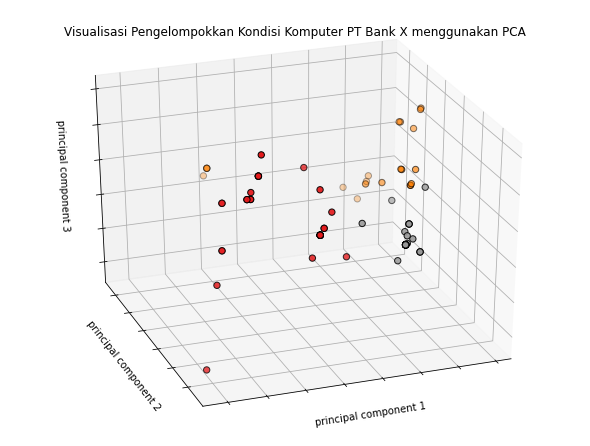

In [ ]:
#Visualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=cluster_final,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Visualisasi Pengelompokkan Kondisi Komputer PT Bank X menggunakan PCA")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 3")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [ ]:
df['Cluster'] = cluster_final
df.head()

,OS Name,RAM,Processor Type,Harddisk Size,Application Errors,System Manufacturer,Umur,Cluster
Device Name,,,,,,,,
17106103MKS,3,1015,5,76317,1629,1,13,1
990180102CCR,23,8015,14,476938,11,1,0,0
WM2PC018544,23,16186,16,1907727,2,1,1,0
RRC15200060017,9,3495,14,953867,45,4,5,0
1150076_CHN,15,2013,12,469572,29,23,6,0


In [ ]:
df.to_excel("CLUSTERING_SAMPLE DATA.xlsx")  